In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit import execute, Aer
from matplotlib.pyplot import*
import numpy as np

In [2]:
# we define the range for the phase difference, such it can take all of the following values:
n = 20
s = [i * 2 * np.pi / n for i in range(n)]
s

[0.0,
 0.3141592653589793,
 0.6283185307179586,
 0.9424777960769379,
 1.2566370614359172,
 1.5707963267948966,
 1.8849555921538759,
 2.199114857512855,
 2.5132741228718345,
 2.827433388230814,
 3.141592653589793,
 3.455751918948772,
 3.7699111843077517,
 4.084070449666731,
 4.39822971502571,
 4.71238898038469,
 5.026548245743669,
 5.340707511102648,
 5.654866776461628,
 5.969026041820607]

In [3]:
# now we construct our quantum circuit for the interferometer with one degree of freedom (the path), and assing to it each value of phi:

qasm_simulator = Aer.get_backend('qasm_simulator') # we call the backend outside of the loop

#we define empty lists to use them later to store the statistics of measuring values 0 and 1 for different values of phi
p0 = []
p1 = []

#we also consider lists for the standard deviations and errors
dp0 = []
dp1 = []

for phi in s:
    q = QuantumCircuit(1,1)
    q.h(0)
    q.p(phi,0)
    q.h(0)
    q.measure([0],[0])
    job = execute([q for i in range(50)],qasm_simulator,shots = 1000) #implement the simulation
    counts = job.result().get_counts()

    temp1 = [] #will store how many 0 values we have for each value of phi
    temp2 = [] #will store how many 1 values we have for each value of phi

    for i in range(50):
        temp1.append(counts[i].get('0',0)/1000) #stores how many (relative population) 0 values we have (50 times) for each value of phi 
        temp2.append(counts[i].get('1',1)/1000) #stores how many (relative population) 1 values we have (50 times) for each value of phi

    p0.append(sum(temp1)/50) # takes the prob of 0 to occur for all the values of phi
    p1.append(sum(temp2)/50) # takes the prob of 1 to occur for all the values of phi
    dp0.append(np.std(temp1))
    dp1.append(np.std(temp2))

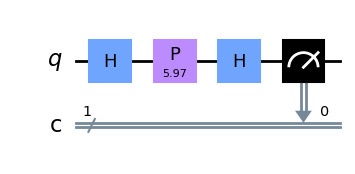

In [4]:
# we draw the circuit
q.draw('mpl')

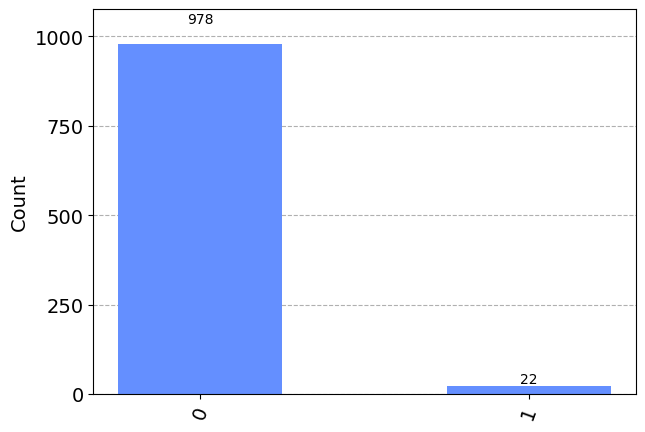

In [5]:
#we can plot an histogram for a value of phi (collected in 'counts') and for one of the 50 executions
plot_histogram(counts[1])

In [6]:
""" 
We can also visualize all the probabilities for all possible values of phi by plotting the probs
p0 and p1
"""

' \nWe can also visualize all the probabilities for all possible values of phi by plotting the probs\np0 and p1\n'

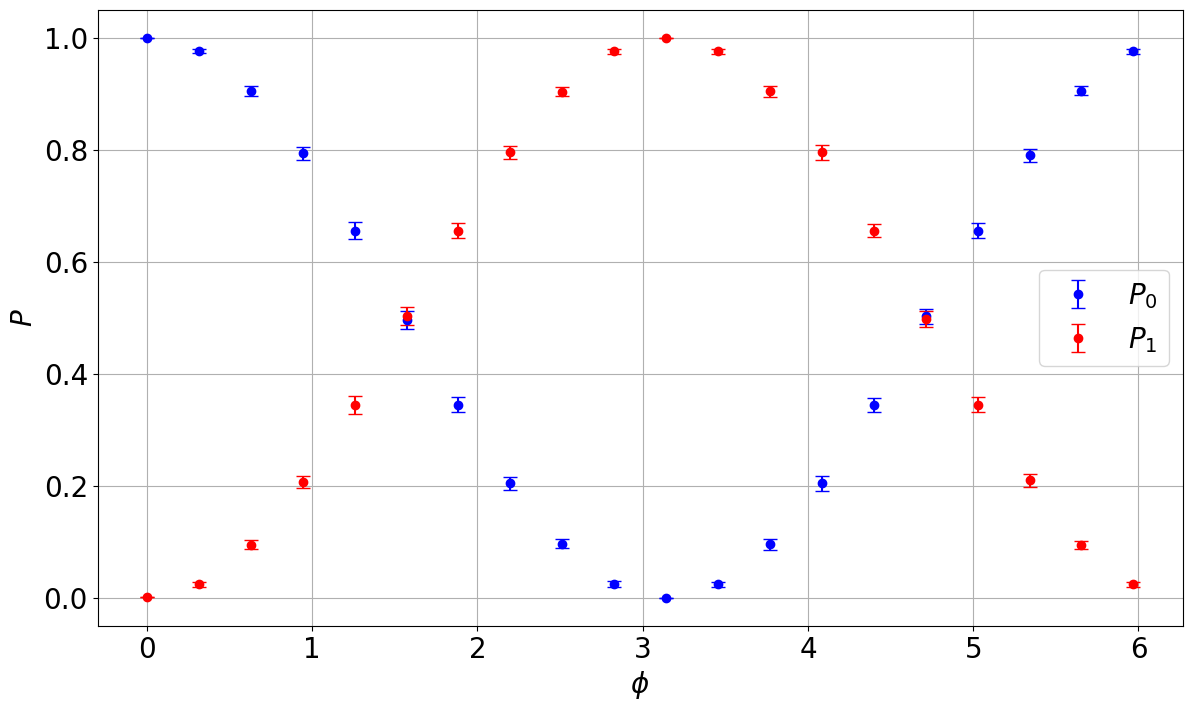

In [7]:
figure(figsize=(14, 8))
errorbar(s,p0,dp0,fmt='b.',capsize=5,label=r"$P_0$",markersize=12)
errorbar(s,p1,dp1,fmt='r.',capsize=5,label=r"$P_1$",markersize=12)

#ylim(-0.2,0.4);
xlabel(r"$\phi$",fontsize=20);
ylabel(r"$P$",fontsize=20);
xticks(fontsize=20); #s,rotation='horizontal',
yticks(fontsize=20);
legend(fontsize=20);
grid("on")

In [8]:
# we define a circuit c1 simulating the interferometer for two degrees of freedom:

theta=np.pi
phi=0

q1 = QuantumCircuit(2,2)
q1.h(0)
q1.cry(theta,0,1)
q1.p(phi,0)
q1.h(0)
q1.measure(0,0)
q1.measure(1,1)

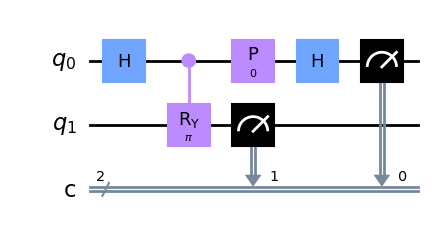

In [9]:
q1.draw('mpl')

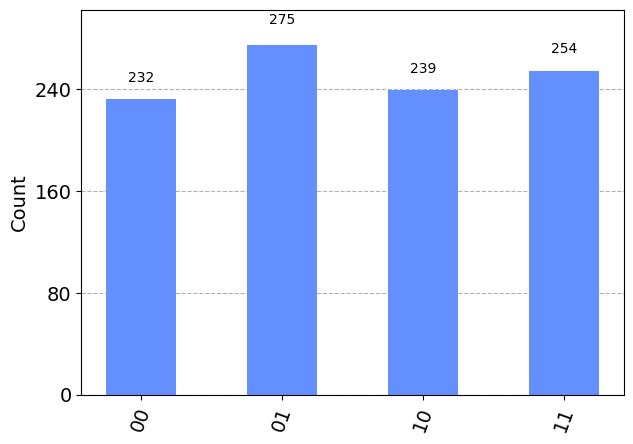

In [10]:
job = execute(q1,qasm_simulator,shots = 1000) 
counts = job.result().get_counts()
plot_histogram(counts)

In [11]:
counts

{'01': 275, '11': 254, '00': 232, '10': 239}

In [26]:
# we can make plots for different values of theta and fixed values of phi:

#we define empty lists to use them later to store the statistics of measuring values 00, 01, 10, 11 for different values of theta and phi
p00 = []
p01 = []
p10 = []
p11 = []

#we also consider lists for the standard deviations and errors
dp00 = []
dp01 = []
dp10 = []
dp11 = []

phi_1 = np.pi

for theta in s:
    q1 = QuantumCircuit(2,2)
    q1.h(0)
    q1.cry(theta,0,1)
    q1.p(phi_1,0)
    q1.h(0)
    q1.measure([0],[0])
    q1.measure([1],[1])
    job = execute([q1 for i in range(50)],qasm_simulator,shots = 1000) #implement the simulation
    counts = job.result().get_counts()

    temp1 = [] #will store how many 00 values we have for each value of theta
    temp2 = [] #will store how many 01 values we have for each value of theta
    temp3 = [] #will store how many 10 values we have for each value of theta
    temp4 = [] #will store how many 11 values we have for each value of theta

    for i in range(50):
        temp1.append(counts[i].get('00',0)/1000) #stores how many (relative population) 00 values we have (50 times) for each value of theta 
        temp2.append(counts[i].get('10',1)/1000) #stores how many (relative population) 01 values we have (50 times) for each value of theta
        temp3.append(counts[i].get('01',2)/1000) #stores how many (relative population) 10 values we have (50 times) for each value of theta 
        temp4.append(counts[i].get('11',3)/1000) #stores how many (relative population) 11 values we have (50 times) for each value of theta

    p00.append(sum(temp1)/50) # takes the prob of 00 to occur for all the values of theta
    p01.append(sum(temp2)/50) # takes the prob of 01 to occur for all the values of theta
    p10.append(sum(temp3)/50) # takes the prob of 10 to occur for all the values of theta
    p11.append(sum(temp4)/50) # takes the prob of 11 to occur for all the values of theta
    dp00.append(np.std(temp1))
    dp01.append(np.std(temp2))
    dp10.append(np.std(temp3))
    dp11.append(np.std(temp4))

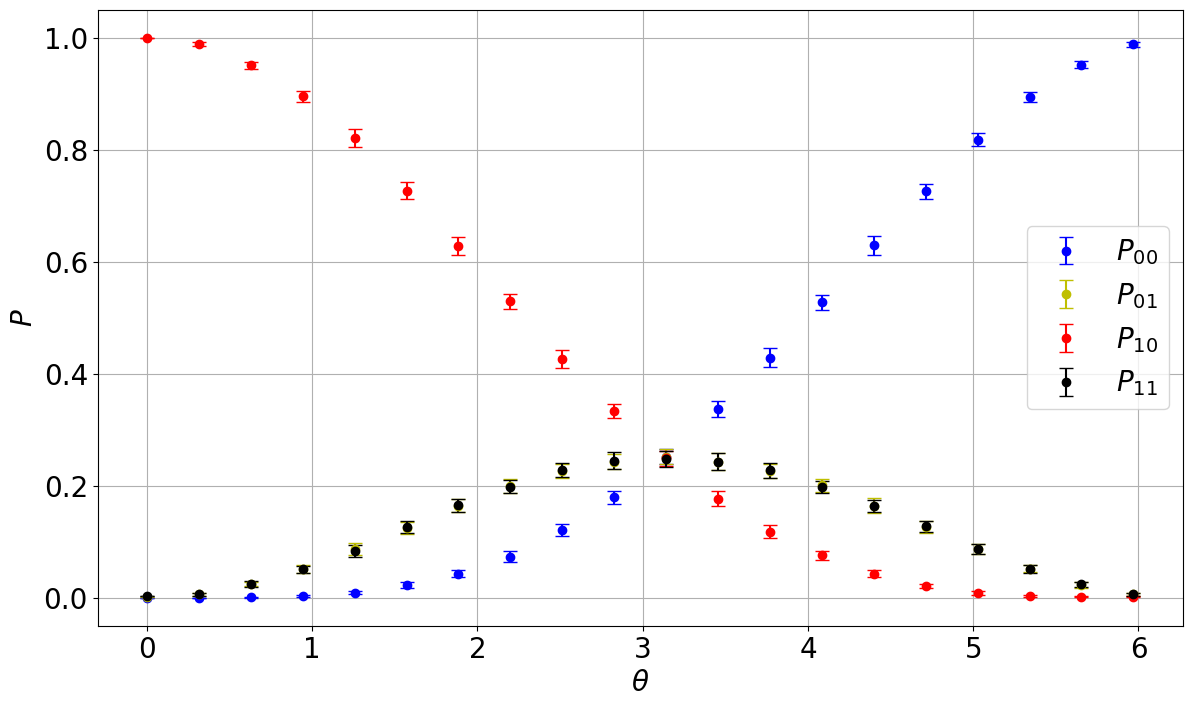

In [27]:
figure(figsize=(14, 8))
errorbar(s,p00,dp00,fmt='b.',capsize=5,label=r"$P_{00}$",markersize=12)
errorbar(s,p01,dp01,fmt='y.',capsize=5,label=r"$P_{01}$",markersize=12)
errorbar(s,p10,dp10,fmt='r.',capsize=5,label=r"$P_{10}$",markersize=12)
errorbar(s,p11,dp11,fmt='k.',capsize=5,label=r"$P_{11}$",markersize=12)

#ylim(-0.2,0.4);
xlabel(r"$\theta$",fontsize=20);
ylabel(r"$P$",fontsize=20);
xticks(fontsize=20); #s,rotation='horizontal',
yticks(fontsize=20);
legend(fontsize=20);
grid("on")

In [14]:
p00

[0.5011400000000001,
 0.49256,
 0.47903999999999997,
 0.4472,
 0.41182,
 0.37118,
 0.33990000000000004,
 0.30378,
 0.2712799999999999,
 0.25762000000000007,
 0.2522999999999999,
 0.2546,
 0.2751,
 0.3017,
 0.3361599999999999,
 0.3720600000000001,
 0.4098800000000001,
 0.4492000000000001,
 0.4732,
 0.4946599999999999]

In [15]:
# we can consider the case 2 for this interferometer

phi_2 = np.pi

p00 = []
p01 = []
p10 = []
p11 = []

dp00 = []
dp01 = []
dp10 = []
dp11 = []

for theta in s:
    q2 = QuantumCircuit(2,2)
    q2.ry(theta,1)
    q2.cx(1,0)
    q2.p(phi_2,0)
    q2.h(0)
    q2.measure([0],[0])
    q2.measure([1],[1])

    job = execute([q2 for i in range(50)],qasm_simulator,shots = 1000)
    counts = job.result().get_counts()

    temp1 = [] 
    temp2 = [] 
    temp3 = []
    temp4 = [] 

    for i in range(50):
        temp1.append(counts[i].get('00',0)/1000) #stores how many (relative population) 00 values we have (50 times) for each value of theta 
        temp2.append(counts[i].get('10',1)/1000) #stores how many (relative population) 01 values we have (50 times) for each value of theta
        temp3.append(counts[i].get('01',2)/1000) #stores how many (relative population) 10 values we have (50 times) for each value of theta 
        temp4.append(counts[i].get('11',3)/1000) #stores how many (relative population) 11 values we have (50 times) for each value of theta

    p00.append(sum(temp1)/50) # takes the prob of 00 to occur for all the values of theta
    p01.append(sum(temp2)/50) # takes the prob of 01 to occur for all the values of theta
    p10.append(sum(temp3)/50) # takes the prob of 10 to occur for all the values of theta
    p11.append(sum(temp4)/50) # takes the prob of 11 to occur for all the values of theta
    dp00.append(np.std(temp1))
    dp01.append(np.std(temp2))
    dp10.append(np.std(temp3))
    dp11.append(np.std(temp4))

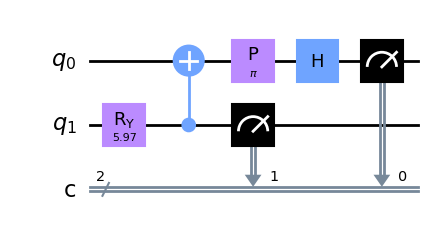

In [16]:
q2.draw('mpl')

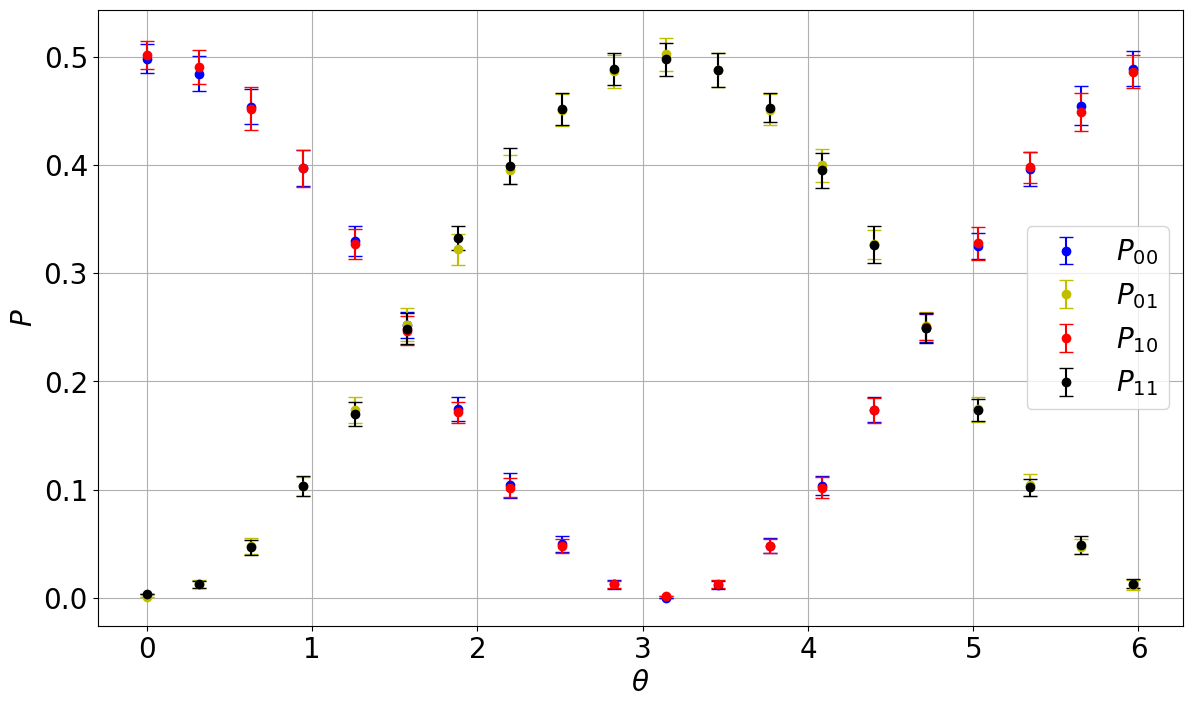

In [17]:
figure(figsize=(14, 8))
errorbar(s,p00,dp00,fmt='b.',capsize=5,label=r"$P_{00}$",markersize=12)
errorbar(s,p01,dp01,fmt='y.',capsize=5,label=r"$P_{01}$",markersize=12)
errorbar(s,p10,dp10,fmt='r.',capsize=5,label=r"$P_{10}$",markersize=12)
errorbar(s,p11,dp11,fmt='k.',capsize=5,label=r"$P_{11}$",markersize=12)

#ylim(-0.2,0.4);
xlabel(r"$\theta$",fontsize=20);
ylabel(r"$P$",fontsize=20);
xticks(fontsize=20); #s,rotation='horizontal',
yticks(fontsize=20);
legend(fontsize=20);
grid("on")